In [2]:
import pickle
import argparse
from utils import get_data, plot_prob_result,seed_everything
import copy
import pandas as pd
# Load the server object
import torch
from torch.nn import MSELoss
import numpy as np
from torch.nn import L1Loss
scale=2

with open('../result/'+str(scale)+'/server.pkl', 'rb') as f:
    server = pickle.load(f)

# Load the clients object
with open('../result/'+str(scale)+'/clients.pkl', 'rb') as f:
    clients = pickle.load(f)

In [5]:
fed_local_proposed_losses=[]
fed_local_proposed_preds=[]
fed_local_proposed_models=[]
for i in range(7):
    fed_local_proposed_pred,fed_local_proposed_loss,fed_local_proposed_model=clients[i].fed_local_evaluation()
    fed_local_proposed_losses.append(fed_local_proposed_loss[server.index_set[i]])
    fed_local_proposed_preds.append(fed_local_proposed_pred[server.index_set[i]])
    fed_local_proposed_models.append(fed_local_proposed_model[server.index_set[i]])
print(fed_local_proposed_losses)

[0.03298545210966713, 0.03542492058995652, 0.03991226300801316, 0.03589802233770183, 0.03715854877133994, 0.03482852455815428, 0.03729868874157945]


In [3]:
local_fine_tune_ewc_losses=[]
local_fine_tune_ewc_preds=[]
local_fine_tune_ewc_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_ewc_pred,local_fine_tune_ewc_loss,local_fine_tune_ewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=True,importance=0.01,fine_tune_epochs=30)
    local_fine_tune_ewc_losses.append(local_fine_tune_ewc_loss)
    local_fine_tune_ewc_preds.append(local_fine_tune_ewc_pred)
    local_fine_tune_ewc_models.append(local_fine_tune_ewc_model)
print(local_fine_tune_ewc_losses)

1e-05 0
self.importance 0.01
Epoch [1/30] Train Loss: 0.0315 Val Loss: 0.0303
Epoch [2/30] Train Loss: 0.0316 Val Loss: 0.0304
Epoch [3/30] Train Loss: 0.0315 Val Loss: 0.0303
Epoch [4/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [5/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [6/30] Train Loss: 0.0315 Val Loss: 0.0301
Epoch [7/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [8/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [9/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [10/30] Train Loss: 0.0315 Val Loss: 0.0307
Epoch [11/30] Train Loss: 0.0315 Val Loss: 0.0301
Epoch [12/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [13/30] Train Loss: 0.0314 Val Loss: 0.0303
Epoch [14/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [15/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [16/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [17/30] Train Loss: 0.0315 Val Loss: 0.0301
Epoch [18/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [19/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [20/30] Train Loss: 0.03

In [61]:
local_fine_tune_noewc_losses=[]
local_fine_tune_noewc_preds=[]
local_fine_tune_noewc_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_noewc_pred,local_fine_tune_noewc_loss,local_fine_tune_noewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=False,importance=0.01,fine_tune_epochs=30)
    local_fine_tune_noewc_losses.append(local_fine_tune_noewc_loss)
    local_fine_tune_noewc_preds.append(local_fine_tune_noewc_pred)
    local_fine_tune_noewc_models.append(local_fine_tune_noewc_model)
print(local_fine_tune_noewc_losses)

1e-05 0
Epoch [1/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [2/30] Train Loss: 0.0316 Val Loss: 0.0302
Epoch [3/30] Train Loss: 0.0315 Val Loss: 0.0304
Epoch [4/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [5/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [6/30] Train Loss: 0.0315 Val Loss: 0.0304
Epoch [7/30] Train Loss: 0.0315 Val Loss: 0.0301
Epoch [8/30] Train Loss: 0.0315 Val Loss: 0.0302
Epoch [9/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [10/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [11/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [12/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [13/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [14/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [15/30] Train Loss: 0.0314 Val Loss: 0.0303
Epoch [16/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [17/30] Train Loss: 0.0314 Val Loss: 0.0302
Epoch [18/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [19/30] Train Loss: 0.0314 Val Loss: 0.0301
Epoch [20/30] Train Loss: 0.0313 Val Loss: 0.0301
E

In [62]:
import pickle

# Load the server object
with open('../best result/'+str(scale)+'/server_benchmark.pkl', 'rb') as f:
    server_benchmark = pickle.load(f)

# Load the clients object
with open('../best result/'+str(scale)+'/clients_benchmark.pkl', 'rb') as f:
    clients_benchmark = pickle.load(f)

In [63]:
fed_local_losses=[]
fed_local_preds=[]
fed_local_models=[]
for i in range(7):
    fed_local_pred,fed_local_loss,fed_local_model=clients_benchmark[i].fed_local_evaluation()
    fed_local_losses.append(fed_local_loss)
    fed_local_preds.append(fed_local_pred)
    fed_local_models.append(fed_local_model)
print(fed_local_losses)

[0.03369925597886721, 0.03519536803591333, 0.040536052285859436, 0.03649028574996819, 0.03685282969732501, 0.035751149217815026, 0.037361839212068954]


In [64]:
central_losses=[]
central_preds=[]
central_models=[]
for i in range(7):
    central_pred,central_loss,central_model=server_benchmark.central_evaluation(dataset=i)
    central_losses.append(central_loss)
    central_preds.append(central_pred)
    central_models.append(central_model)
print(central_losses)

[0.03351356244122941, 0.036986248012734195, 0.04195590437810919, 0.03670282113008609, 0.03858827480931498, 0.036174907387323575, 0.03923958658610713]


In [68]:
local_losses=[]
local_preds=[]
local_models=[]
for i in range(7):
    local_pred,local_loss,local_model=clients_benchmark[i].local_evaluation()
    local_losses.append(local_loss)
    local_preds.append(local_pred)
    local_models.append(local_model)
print(local_losses)

[0.034732953587878646, 0.03555965946017675, 0.041256042988332985, 0.03833038607701557, 0.037461373572276066, 0.03598206073415708, 0.0373462200809066]


In [66]:
local_fine_tune_benchmark_losses=[]
local_fine_tune_benchmark_preds=[]
local_fine_tune_benchmark_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_benchmark_pred,local_fine_tune_benchmark_loss,local_fine_tune_benchmark_model=clients_benchmark[i].local_fine_tune(fine_tune_epochs=30)
    local_fine_tune_benchmark_losses.append(local_fine_tune_benchmark_loss)
    local_fine_tune_benchmark_preds.append(local_fine_tune_benchmark_pred)
    local_fine_tune_benchmark_models.append(local_fine_tune_benchmark_model)
print(local_fine_tune_benchmark_losses)

1e-05 0
Epoch [1/30] Train Loss: 0.0318 Val Loss: 0.0306
Epoch [2/30] Train Loss: 0.0320 Val Loss: 0.0306
Epoch [3/30] Train Loss: 0.0319 Val Loss: 0.0306
Epoch [4/30] Train Loss: 0.0319 Val Loss: 0.0305
Epoch [5/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [6/30] Train Loss: 0.0318 Val Loss: 0.0306
Epoch [7/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [8/30] Train Loss: 0.0318 Val Loss: 0.0305
Epoch [9/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [10/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [11/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [12/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [13/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [14/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [15/30] Train Loss: 0.0317 Val Loss: 0.0305
Epoch [16/30] Train Loss: 0.0317 Val Loss: 0.0303
Epoch [17/30] Train Loss: 0.0317 Val Loss: 0.0304
Epoch [18/30] Train Loss: 0.0317 Val Loss: 0.0303
Epoch [19/30] Train Loss: 0.0317 Val Loss: 0.0303
Epoch [20/30] Train Loss: 0.0316 Val Loss: 0.0304
E

In [67]:
local_fine_tune_ewc_benchmark_losses=[]
local_fine_tune_ewc_benchmark_preds=[]
local_fine_tune_ewc_benchmark_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_ewc_benchmark_pred,local_fine_tune_ewc_benchmark_loss,local_fine_tune_ewc_benchmark_model=clients_benchmark[i].local_fine_tune(ewc_flag=True,importance=0.01,fine_tune_epochs=30)
    local_fine_tune_ewc_benchmark_losses.append(local_fine_tune_ewc_benchmark_loss)
    local_fine_tune_ewc_benchmark_preds.append(local_fine_tune_ewc_benchmark_pred)
    local_fine_tune_ewc_benchmark_models.append(local_fine_tune_ewc_benchmark_model)
print(local_fine_tune_ewc_benchmark_losses)

1e-05 0
self.importance 0.01
Epoch [1/30] Train Loss: 0.0319 Val Loss: 0.0306
Epoch [2/30] Train Loss: 0.0319 Val Loss: 0.0307
Epoch [3/30] Train Loss: 0.0319 Val Loss: 0.0307
Epoch [4/30] Train Loss: 0.0319 Val Loss: 0.0305
Epoch [5/30] Train Loss: 0.0319 Val Loss: 0.0304
Epoch [6/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [7/30] Train Loss: 0.0319 Val Loss: 0.0304
Epoch [8/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [9/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [10/30] Train Loss: 0.0318 Val Loss: 0.0310
Epoch [11/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [12/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [13/30] Train Loss: 0.0318 Val Loss: 0.0306
Epoch [14/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [15/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [16/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [17/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [18/30] Train Loss: 0.0318 Val Loss: 0.0304
Epoch [19/30] Train Loss: 0.0318 Val Loss: 0.0303
Epoch [20/30] Train Loss: 0.03

In [69]:
print(local_losses)
print(central_losses)
print(fed_local_losses)
print(local_fine_tune_benchmark_losses)
print(local_fine_tune_ewc_benchmark_losses)
print(fed_local_proposed_losses)
print(local_fine_tune_noewc_losses)
print(local_fine_tune_ewc_losses)

print(np.mean(local_fine_tune_ewc_benchmark_losses))
print(np.mean(local_fine_tune_benchmark_losses))

[0.034732953587878646, 0.03555965946017675, 0.041256042988332985, 0.03833038607701557, 0.037461373572276066, 0.03598206073415708, 0.0373462200809066]
[0.03351356244122941, 0.036986248012734195, 0.04195590437810919, 0.03670282113008609, 0.03858827480931498, 0.036174907387323575, 0.03923958658610713]
[0.03369925597886721, 0.03519536803591333, 0.040536052285859436, 0.03649028574996819, 0.03685282969732501, 0.035751149217815026, 0.037361839212068954]
[0.033156270237818156, 0.034703732302335845, 0.040098275313128345, 0.03563182553187115, 0.0366086190126275, 0.0351469776567633, 0.03705518918226741]
[0.033025337957254014, 0.034724701164060665, 0.040072381649523564, 0.03573513689948476, 0.03666068696455188, 0.03524231386677145, 0.03708885477740981]
[0.03298545210966713, 0.03542492058995652, 0.03991226300801316, 0.03589802233770183, 0.03715854877133994, 0.03482852455815428, 0.03729868874157945]
[0.033059661570068906, 0.03453651395919796, 0.039298020902868006, 0.03550124115769892, 0.036618791048

In [5]:
parser_train = argparse.ArgumentParser(description='FL')
parser_train.add_argument('--root_path', type=str, default='../Data/GFC12/')
parser_train.add_argument('--dataset_paths', type=list, default=["wf1", "wf2", "wf3", "wf4", "wf5", "wf6", "wf7"])
parser_train.add_argument('--number_clients', type=int, default=7)
parser_train.add_argument('--seq_len', type=int, default=24*4)
parser_train.add_argument('--pred_len', type=int, default=scale)
parser_train.add_argument('--label_len', type=int, default=0)
parser_train.add_argument('--train_length', type=int, default=16800)
parser_train.add_argument('--target', type=str, default='target')
parser_train.add_argument('--scale', type=bool, default=True)
parser_train.add_argument('--inverse', type=bool, default=True)
parser_train.add_argument('--k', type=int, default=2)

parser_train.add_argument('--lr', type=float, default=1e-4)
parser_train.add_argument('--fine_tune_lr', type=float, default=1e-5)
parser_train.add_argument('--global_epochs', type=int, default=200)
parser_train.add_argument('--local_epochs', type=int, default=1)
parser_train.add_argument('--fine_tune_epochs', type=int, default=20)
parser_train.add_argument('--patience', type=int, default=3)
parser_train.add_argument('--fed_patience', type=int, default=3)
parser_train.add_argument('--hidden_layers', type=list, default=[64,64,64])
parser_train.add_argument('--input_size', type=int, default=293)
parser_train.add_argument('--output_size', type=int, default=9)


parser_train.add_argument('--warm_up_epochs', type=int, default=15)
parser_train.add_argument('--selection_epochs', type=int, default=4)
parser_train.add_argument('--importance', type=float, default=0)
parser_train.add_argument('--batch_size', type=int, default=64)
parser_train.add_argument('--device', type=str, default='cuda:1' if torch.cuda.is_available() else 'cpu')
parser_train.add_argument('--forecasting_mode', type=str, default='prob')
parser_train.add_argument('--model_type', type=str, default='NN')
parser_train.add_argument('--model_save_path', type=str, default='../Model2/', help='location of model checkpoints')
parser_train.add_argument('--quantiles', type=list, default=[0.1,0.2,0.3,0.4, 0.5,0.6,0.7,0.8, 0.9])
parser_train.add_argument('--decay', type=float, default=0.75)
args_train = parser_train.parse_args(args=[])

In [6]:
import torch
from torch.nn import MSELoss
import numpy as np
class RMSELoss:
    def __init__(self, reduction: str = 'mean'):
        self.reduction = reduction
        self.mse_loss = MSELoss(reduction=reduction)

    def __call__(self, output: torch.Tensor, target: torch.Tensor):
        output=output.cpu()[:,4]#.reshape(-1,1)
        mse = self.mse_loss(output, target)
        rmse = torch.sqrt(mse)

        if self.reduction == 'sum':
            rmse = rmse.sum()
        if self.reduction == 'mean':
            rmse = rmse.mean()

        return rmse
    

import torch
from torch.nn import L1Loss

class MAELoss:
    def __init__(self, reduction: str = 'mean'):
        self.reduction = reduction
        self.mae_loss = L1Loss(reduction=reduction)

    def __call__(self, output: torch.Tensor, target: torch.Tensor):
        output = output.cpu()[:, 4]
        mae = self.mae_loss(output, target)

        if self.reduction == 'sum':
            mae = mae.sum()
        if self.reduction == 'mean':
            mae = mae.mean()

        return mae

In [7]:
actual_y_lst=[]

for i in range(7):
    args_temp=copy.deepcopy(args_train)
    args_temp.dataset_paths='wf'+str(i+1)
    test_data, test_loader = get_data(args_temp,flag='test')
    actual_y=[]
    for idx, (seq_x, seq_x_concat, seq_y) in enumerate(test_loader):
        actual_y.append(seq_y)
    actual_y = torch.cat([torch.flatten(t) for t in actual_y])
    actual_y_lst.append(actual_y)

In [73]:
local_rmse = []
central_rmse = []
fed_local_rmse = []
local_fine_tune_rmse = []
fed_local_proposed_rmse = []
local_fine_tune_noewc_rmse = []
local_fine_tune_ewc_rmse = []
local_fine_tune_benchmark_ewc_rmse = []
rmse_loss = RMSELoss('mean')

for i in range(7):
    fed_local_rmse.append(rmse_loss(fed_local_preds[i], actual_y_lst[i]))
    local_rmse.append(rmse_loss(local_preds[i], actual_y_lst[i]))
    central_rmse.append(rmse_loss(central_preds[i], actual_y_lst[i]))
    local_fine_tune_rmse.append(rmse_loss(local_fine_tune_benchmark_preds[i], actual_y_lst[i]))
    local_fine_tune_benchmark_ewc_rmse.append(rmse_loss(local_fine_tune_ewc_benchmark_preds[i], actual_y_lst[i]))
    fed_local_proposed_rmse.append(rmse_loss(fed_local_proposed_preds[i], actual_y_lst[i]))
    local_fine_tune_noewc_rmse.append(rmse_loss(local_fine_tune_noewc_preds[i], actual_y_lst[i]))
    local_fine_tune_ewc_rmse.append(rmse_loss(local_fine_tune_ewc_preds[i], actual_y_lst[i]))

df_RMSE = pd.DataFrame({
    'local_rmse': np.array(local_rmse),
    'central_rmse': np.array(central_rmse),
    'fed_local_rmse': np.array(fed_local_rmse),
    'local_fine_tune_rmse': np.array(local_fine_tune_rmse),
    'local_fine_tune_benchmark_ewc_rmse': np.array(local_fine_tune_benchmark_ewc_rmse),
    'fed_local_proposed_rmse': np.array(fed_local_proposed_rmse),
    'local_fine_tune_noewc_rmse': np.array(local_fine_tune_noewc_rmse),
    'local_fine_tune_ewc_rmse': np.array(local_fine_tune_ewc_rmse),
}).T
df_RMSE['mean_rmse'] = df_RMSE.mean(axis=1)
df_RMSE.to_csv('rmse.csv', index=False)

In [8]:
local_mae = []
central_mae = []
fed_local_mae = []
local_fine_tune_mae = []
fed_local_proposed_mae = []
local_fine_tune_noewc_mae = []
local_fine_tune_ewc_mae = []
local_fine_tune_benchmark_ewc_mae = []
mae_loss = MAELoss('mean')

for i in range(7):
    fed_local_mae.append(mae_loss(fed_local_preds[i], actual_y_lst[i]))
    local_mae.append(mae_loss(local_preds[i], actual_y_lst[i]))
    central_mae.append(mae_loss(central_preds[i], actual_y_lst[i]))
    local_fine_tune_mae.append(mae_loss(local_fine_tune_benchmark_preds[i], actual_y_lst[i]))
    local_fine_tune_benchmark_ewc_mae.append(mae_loss(local_fine_tune_ewc_benchmark_preds[i], actual_y_lst[i]))
    fed_local_proposed_mae.append(mae_loss(fed_local_proposed_preds[i], actual_y_lst[i]))
    local_fine_tune_noewc_mae.append(mae_loss(local_fine_tune_noewc_preds[i], actual_y_lst[i]))
    local_fine_tune_ewc_mae.append(mae_loss(local_fine_tune_ewc_preds[i], actual_y_lst[i]))

df_MAE = pd.DataFrame({
    'local_mae': np.array(local_mae),
    'central_mae': np.array(central_mae),
    'fed_local_mae': np.array(fed_local_mae),
    'local_fine_tune_mae': np.array(local_fine_tune_mae),
    'local_fine_tune_benchmark_ewc_mae': np.array(local_fine_tune_benchmark_ewc_mae),
    'fed_local_proposed_mae': np.array(fed_local_proposed_mae),
    'local_fine_tune_noewc_mae': np.array(local_fine_tune_noewc_mae),
    'local_fine_tune_ewc_mae': np.array(local_fine_tune_ewc_mae),
}).T
df_MAE['mean_mae'] = df_MAE.mean(axis=1)
df_MAE.to_csv('mae.csv', index=False)

NameError: name 'fed_local_preds' is not defined

In [75]:
df_MAE

,0,1,2,3,4,5,6,mean_mae
local_mae,0.087845,0.090220,0.103717,0.096035,0.093166,0.090322,0.094238,0.093649
central_mae,0.085175,0.095115,0.105609,0.092431,0.097186,0.091037,0.099546,0.095157
fed_local_mae,0.085591,0.089484,0.101196,0.092783,0.091940,0.090289,0.093949,0.092176
local_fine_tune_mae,0.084159,0.088173,0.101002,0.089963,0.091203,0.088014,0.093202,0.090816
local_fine_tune_benchmark_ewc_mae,0.083742,0.088251,0.100837,0.090224,0.091333,0.088401,0.093238,0.090861
fed_local_proposed_mae,0.083467,0.088991,0.100936,0.090251,0.092528,0.087706,0.094910,0.091256
local_fine_tune_noewc_mae,0.083613,0.087111,0.099373,0.089383,0.091130,0.086988,0.091889,0.089927
local_fine_tune_ewc_mae,0.083296,0.087292,0.099268,0.089660,0.090597,0.086965,0.091945,0.089861


In [76]:
df_RMSE

,0,1,2,3,4,5,6,mean_rmse
local_rmse,0.125048,0.133636,0.156179,0.142456,0.146957,0.135633,0.144378,0.140612
central_rmse,0.121482,0.134622,0.153668,0.134352,0.146434,0.133876,0.143573,0.138287
fed_local_rmse,0.125004,0.134221,0.154793,0.137757,0.146939,0.136328,0.143292,0.139762
local_fine_tune_rmse,0.120682,0.132281,0.153148,0.134387,0.145844,0.133942,0.143149,0.137633
local_fine_tune_benchmark_ewc_rmse,0.121187,0.132610,0.153729,0.134505,0.145799,0.134103,0.143265,0.137885
fed_local_proposed_rmse,0.121317,0.132325,0.151740,0.133109,0.146303,0.131552,0.140318,0.136666
local_fine_tune_noewc_rmse,0.120556,0.131455,0.150846,0.134095,0.146291,0.132243,0.140911,0.136628
local_fine_tune_ewc_rmse,0.120830,0.131893,0.151147,0.134171,0.145573,0.132267,0.140904,0.136683


In [77]:
df = pd.DataFrame({
    'local_losses': local_losses,
    'central_losses': central_losses,
    'fed_local_losses': fed_local_losses,
    'local_fine_tune_benchmark_losses': local_fine_tune_benchmark_losses,
    'local_fine_tune_ewc_benchmark_losses': local_fine_tune_ewc_benchmark_losses,
    'fed_local_proposed_losses': fed_local_proposed_losses,
    'local_fine_tune_noewc_losses': local_fine_tune_noewc_losses,
    'local_fine_tune_ewc_losses': local_fine_tune_ewc_losses
}).T

df.to_csv('losses.csv', index=False)

In [14]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

In [18]:
def plot_prob_result(result,actual,start,end):
    plt.figure(figsize=(11, 4))
    for i in range(result.shape[1]):
        print('y'+str(i))
        vars()['y'+str(i)] = result[:,i].detach().cpu().numpy()[start:end].squeeze()
    
    y=actual[start:end].squeeze()
    x = range(end-start)
    
    lists=[]
    list_names=[]
    color_list=['#c0c8de', '#7ca3c3', '#427ea3', '#2c5382']
    for i in range(result.shape[1]):
        lists.append(vars()['y'+str(i)])
        list_names.append('y'+str(i))

    # 对每个序号的元素进行排序
    sorted_lists = {}
    for name in list_names:
        sorted_lists[name + '_sort'] = []

    for i in range(len(vars()['y'+str(1)])):
        # 获取每个列表的第i个元素
        values = [lst[i] for lst in lists]
        # 对元素进行排序，并获取排序后的索引
        sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
        # 将排序后的列表添加到sorted_lists
        for j, index in enumerate(sorted_indices):
            sorted_lists[list_names[j] + '_sort'].append(lists[index][i])


    plt.fill_between(x, sorted_lists['y0_sort'], sorted_lists['y8_sort'],  color=color_list[1], alpha=0.6, label='80% CI')
    plt.fill_between(x, sorted_lists['y1_sort'], sorted_lists['y7_sort'], color=color_list[1], alpha=0.7, label='60% CI')
    plt.fill_between(x, sorted_lists['y2_sort'], sorted_lists['y6_sort'],  color=color_list[2], alpha=0.8, label='40% CI')
    plt.fill_between(x, sorted_lists['y3_sort'], sorted_lists['y5_sort'], color=color_list[3], alpha=0.9, label='20% CI')
    plt.plot(x,sorted_lists['y4_sort'],color='black',label='Median')
    plt.plot(x,y,color='red',label='Actual')

    plt.legend(fontsize='small',ncol=3)
    date_range = pd.date_range(start='2011-06-05', end='2011-07-5', freq='H')
    print(list(range(start, end, 24*5)))
    plt.xticks(ticks=range(start, end, 24*5), labels=date_range[::24*5].strftime('%Y-%m-%d'), rotation=0)
    plt.ylabel('Normalized Power Output')
    plt.xlabel('Date')
    plt.savefig('../Figure/prob_result.png', dpi=1000, bbox_inches='tight')
    # 显示图形
    plt.show()

In [54]:
result=local_fine_tune_ewc_preds[0]
actual=actual_y_lst[0]

In [67]:
result=local_fine_tune_ewc_preds[0]
actual=actual_y_lst[0]

y0
y1
y2
y3
y4
y5
y6
y7
y8
[0, 120, 240, 360, 480, 600, 720]


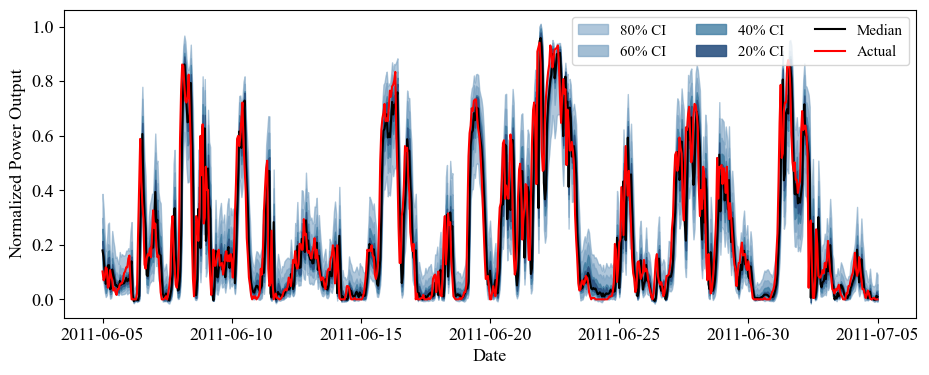

In [19]:
result=local_fine_tune_ewc_preds[1]
actual=actual_y_lst[1]
start=0
end=721
plt.rcParams["font.size"] = 13
plot_prob_result(result,actual,start,end)